In [9]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [10]:
dados = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()

In [11]:
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [12]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date':'ds', 'Close':'y'})

In [13]:
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnnlpzpp4/4ahoabed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnnlpzpp4/8wjlzhnk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86864', 'data', 'file=/tmp/tmpnnlpzpp4/4ahoabed.json', 'init=/tmp/tmpnnlpzpp4/8wjlzhnk.json', 'output', 'file=/tmp/tmpnnlpzpp4/prophet_modelsne6ulgg/prophet_model-20240330161421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:14:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:14:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

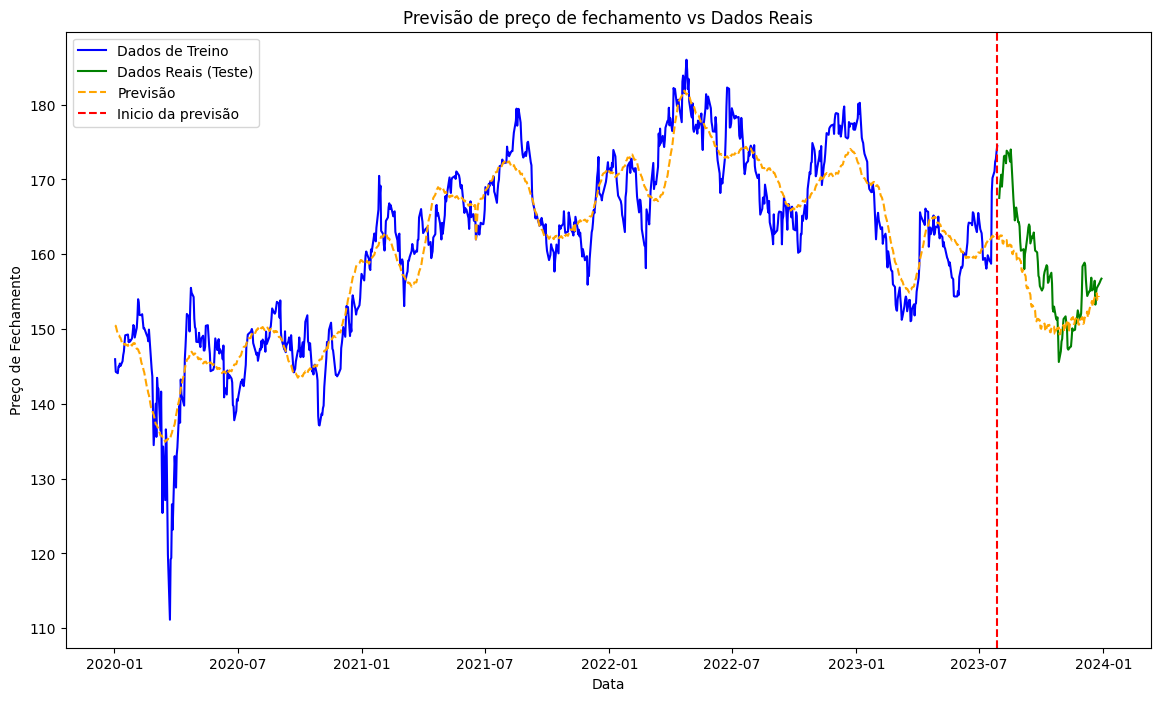

In [23]:
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Inicio da previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de preço de fechamento vs Dados Reais')
plt.legend()
plt.show()